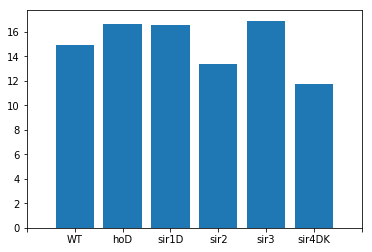

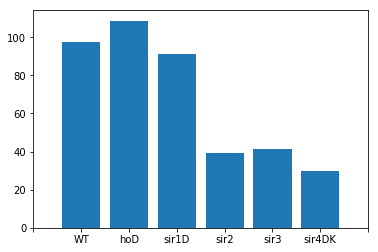

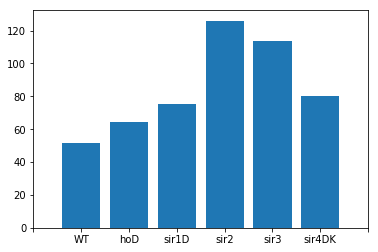

In [2]:
%matplotlib inline

##Exercise 1.a##

#!/usr/bin/env python
import matplotlib.pyplot as plt

# Function to parse and plot the data
def barFPKMs(tableFile, gene):
    # Grab the header
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    
    # Grab the data for our gene
    # The gene names are in the first column
    for line in fh:
        if line.startswith(gene):
            data = line.strip().split()[1:]
            data = map(float, data) # Convert all data to a float
            break
    else:
        print "Gene not found"
        return 0
    
    # Make a plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    # Matplotlib assumes you have numerical data for both axes
    # But for the X axis, we have categorical data
    # So we need to plug in a range of numbers to place the bars at
    x = range(len(data))
    
    # Bars will appear at 0, 1, 2, etc
    # So set the x-limits to include these values
    ax.set_xlim(-1, len(data))
    
    ax.bar(x, data, align='center')
    
    # Now we change the labels for our categorical data
    labels = [''] + header[1:] # We don't need to label 'Gene' at -1
    ax.set_xticklabels(labels)
    
    plt.show()

barFPKMs('FPKM_table.tab', 'MAK10')
barFPKMs('FPKM_table.tab', 'DDR2')
barFPKMs('FPKM_table.tab', 'HSP12')

632


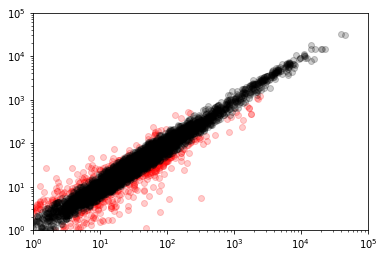

In [8]:
##Exercise 1.b##

# Function to parse and plot the data
def scatterFPKMs(tableFile,sample1,sample2):
    # Figure out which columns we need.
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    i1 = header.index(sample1)
    i2 = header.index(sample2)
    
    # Pull out the data series from each column.
    # Keep genes that vary significantly in sigx and sigy.
    # Keep less variable genes in insigx and insigy.
    sigx = []
    sigy = []
    insigx = []
    insigy = []
    for line in fh:
        line = line.strip().split()
        x = float(line[i1])
        y = float(line[i2])
        if (x > 2 * y) or (y > 2 * x):
            sigx.append(x)
            sigy.append(y)
        else:
            insigx.append(x)
            insigy.append(y)

    
    # Make a plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # Set log scales
    ax.set_yscale('log')
    ax.set_xscale('log')
    # Set limits on the axes
    # Because the scale is log, min must be >0
    ax.set_xlim(1, 100000)
    ax.set_ylim(1, 100000)
    
    # Plot the points from each line of data
    # Significant variation in red
    ax.plot(sigx, sigy, 'ro', alpha=0.2)
    # Insignificant variation in black
    ax.plot(insigx, insigy, 'ko', alpha=0.2)
        
    plt.show()
 
scatterFPKMs("FPKM_table.tab",'WT','sir2')

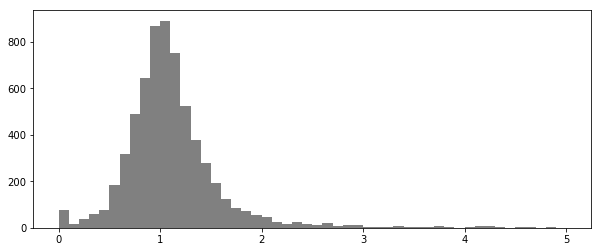

In [9]:
##Exercise 1.c##

# Function to parse and plot the data
# in this case, the samples plotted are supplied in a list
def histogramFPKMs(tableFile, sample1, sample2):
    # Figure out which columns we need.
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    idx1 = header.index(sample1)
    idx2 = header.index(sample2)
    
    # Parse out the relevant columns and calculate the expression ratio
    ratios = []
    for line in fh:
        line = line.strip().split()
        fpkm1 = float(line[idx1])
        fpkm2 = float(line[idx2])
        if fpkm2: # cannot divide by zero
            ratio = fpkm1 / fpkm2
            ratios.append(ratio)
    
    # Make a plot & plot the data as a histogram
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,1,1)
    ax.hist(ratios, bins=50, range=(0,5), color='gray')
        
    plt.show()
 
histogramFPKMs("FPKM_table.tab", 'WT', 'sir2')

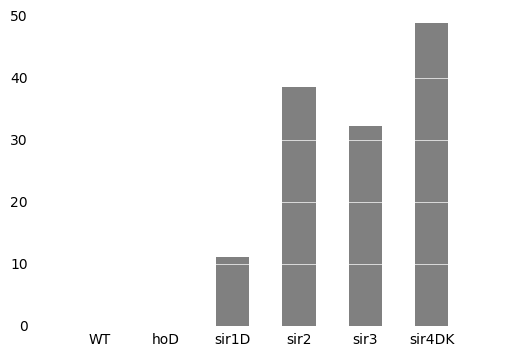

In [5]:
##Exercise 1.d##

# Function to make beautiful bar graphs
def barFPKMs(tableFile, gene):
    # Grab the header
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    
    # Grab the data for our gene
    # The gene names are in the first column
    for line in fh:
        if line.startswith(gene):
            data = line.strip().split()[1:]
            data = map(float, data) # Convert all data to a float
            break
    else:
        print "Gene not found"
        return 0
    
    # Make a plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    # Matplotlib assumes you have numerical data for both axes
    # But for the X axis, we have categorical data
    # So we need to plug in a range of numbers to place the bars at
    x = range(len(data))
    
    # Bars will appear at 0, 1, 2, etc
    # So set the x-limits to include these values
    ax.set_xlim(-1, len(data))
    
    # Here we turn the bars grey and remove their edge border.
    # Also make the bars a little more narrow.
    ax.bar(x, data, align='center', color='gray', edgecolor='none', width=0.5)
    
    # Now we change the labels for our categorical data
    labels = [''] + header[1:] # We don't need to label 'Gene' at -1
    ax.set_xticklabels(labels)
    
    # Hide the frame around the plot
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    # Turn off the ticks
    ax.tick_params(bottom='off', top='off', left='off', right='off')
    # Overlay a white grid on the y axis
    ax.yaxis.grid(True, color='white', linestyle='solid')
    
    plt.show()
    
barFPKMs('FPKM_table.tab', 'HMLALPHA2')

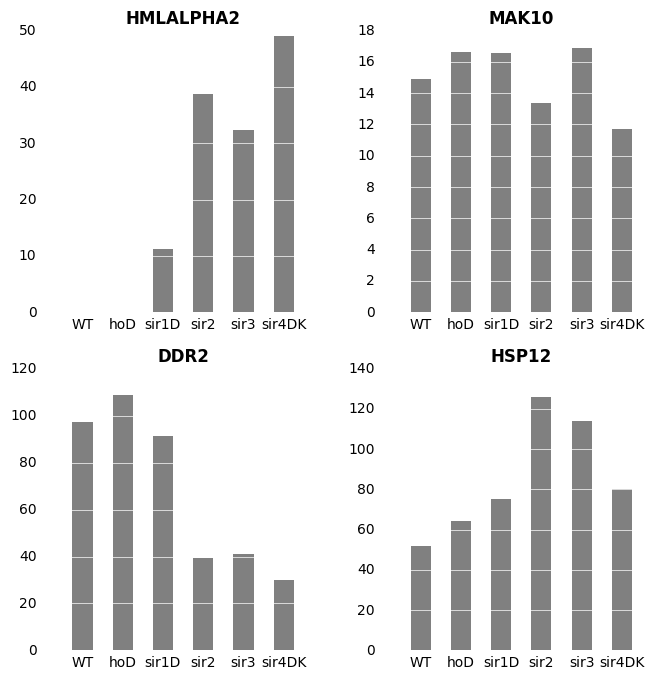

In [6]:
##Exercise 1.e##

# Function to plot a beautiful fpkm bar graph on an axes object
def barFPKMs(ax, tableFile, gene):
    # Grab the header
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    
    # Grab the data for our gene
    # The gene names are in the first column
    for line in fh:
        if line.startswith(gene):
            data = line.strip().split()[1:]
            data = map(float, data) # Convert all data to a float
            break
    else:
        print "Gene not found"
        return 0
    
    # Matplotlib assumes you have numerical data for both axes
    # But for the X axis, we have categorical data
    # So we need to plug in a range of numbers to place the bars at
    x = range(len(data))
    
    # Bars will appear at 0, 1, 2, etc
    # So set the x-limits to include these values
    ax.set_xlim(-1, len(data))
    
    # Here we turn the bars grey and remove their edge border.
    # Also make the bars a little more narrow.
    ax.bar(x, data, align='center', color='gray', edgecolor='none', width=0.5)
    
    # Now we change the labels for our categorical data
    labels = [''] + header[1:] # We don't need to label 'Gene' at -1
    ax.set_xticklabels(labels)
    
    # Hide the frame around the plot
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    # Turn off the ticks
    ax.tick_params(bottom='off', top='off', left='off', right='off')
    # Overlay a white grid on the y axis
    ax.yaxis.grid(True, color='white', linestyle='solid')
    
    # Label the gene name on the subplot
    ax.set_title(gene, fontweight='bold')

# Make a figure with 4 axes subplots
fig = plt.figure(figsize=(8,8))
axes = [fig.add_subplot(2, 2, i) for i in range(1,5)]

# Use the plotting function 4 times, ploting each gene onto each axes
genes = ['HMLALPHA2', 'MAK10', 'DDR2', 'HSP12']
[barFPKMs(axes[i], 'FPKM_table.tab', gene) for i, gene in enumerate(genes)]

plt.show()

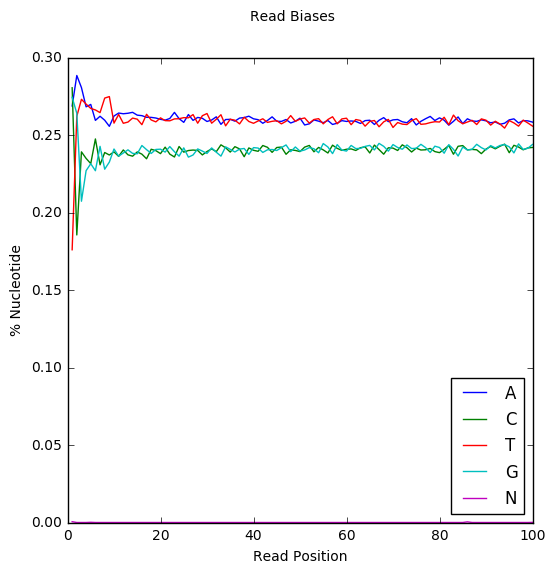

In [7]:
##Exercise 2##

#!/usr/env/bin python
import numpy as np
import matplotlib.pyplot as plt

def parse_fastq(fastq_file):
    fh = open(fastq_file, 'r')
    
    while True:
        ID = fh.readline().strip()
        seq = fh.readline().strip()
        ID2 = fh.readline().strip()
        qual = fh.readline().strip()
        
        if not ID:
            break # end of file, finished successfully
    
        yield ID, seq, ID2, qual

def base_frequencies(fastq_file):
    fastq = parse_fastq(fastq_file)
    
    bases = ['A', 'T', 'C', 'G', 'N']
    
    # First initialize some arrays of the sequence length
    for ID, seq, ID2, qual in fastq:    
        seq = np.array(list(seq))
        readlength = len(seq)
        base_freqs = {base : (seq == base).astype(int) for base in bases}
        break
    
    # fastq is an iterator, and like filehandles,
    # iterators 'remember' their place
    for ID, seq, ID2, qual in fastq:    
        seq = np.array(list(seq))
        for base in bases:
            base_freqs[base] += seq == base
            
    # Find out the total number of reads
    totals = sum(base_freqs.values()).astype(float)
    
    # Calculate the percent frequencies of each base at all positions
    base_percents = {base : (base_freqs[base] / totals) for base in bases}
    
    return base_percents, readlength

def base_linegraph(base_percents, readlength):
    # Plot the percent of each base by read position
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1, 1, 1)
    
    # Note that base_percents is a
    # dictionary keyed by the bases.
    for base, percents in base_percents.items():
        ax.plot(range(1, readlength+1), percents, label=base)

    # Add titles as per b)
    fig.suptitle('Read Biases')
    ax.set_ylabel('% Nucleotide')
    ax.set_xlabel('Read Position')

    # Add a legend as per b)
    legend = ax.legend(loc='lower right')
    
    plt.savefig('base_frequencies.png')

    
# Parse the fastq file
base_percents, readlength = base_frequencies('illumina_reads.fastq')
# Use our function to plot the data
base_linegraph(base_percents, readlength)

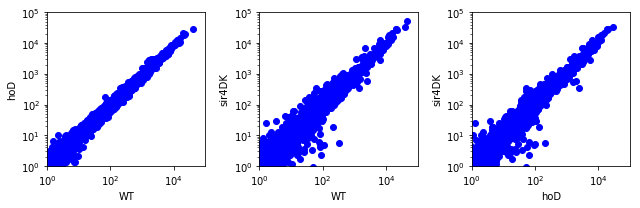

In [10]:
##Exercise 3##
#!/usr/bin/env python

import matplotlib.pyplot as plt

# Function to parse and plot the data on an axes object
def scatterFPKMs(axes, tableFile, sample1, sample2):
    # Figure out which columns we need.
    fh = open(tableFile, 'r')
    header = fh.readline().strip().split()
    i1 = header.index(sample1)
    i2 = header.index(sample2)
    
    # Pull out the data series from each column
    x = []
    y = []
    for line in fh:
        line = line.strip().split()
        x.append(line[i1])
        y.append(line[i2])
    
    fh.close()
    
    # Plot all the points
    axes.plot(x, y, 'bo')

    # Set log scale and limits
    axes.set_yscale('log')
    axes.set_xscale('log')
    axes.set_xlim(1, 100000)
    axes.set_ylim(1, 100000)
    
    # Add labels
    axes.set_xlabel(sample1)
    axes.set_ylabel(sample2)
    
table = 'FPKM_table.tab'

fig = plt.figure(figsize=(9,3))
axeses = [fig.add_subplot(1, 3, i+1) for i in range(3)]

scatterFPKMs(axeses[0], table, 'WT', 'hoD')
scatterFPKMs(axeses[1], table, 'WT', 'sir4DK')
scatterFPKMs(axeses[2], table, 'hoD', 'sir4DK')

fig.tight_layout() # This will make the labels fit better
plt.savefig('exercise3.ps')

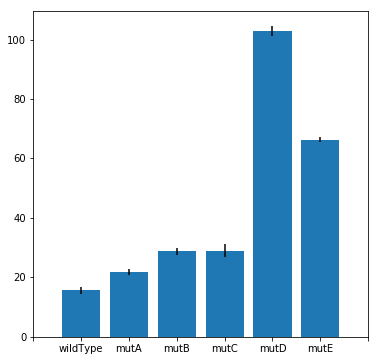

In [11]:
##Exercise 4##
#!/usr/bin/env python

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def barplot_with_error(tabfile):
    # Parse the table
    table = open(tabfile, 'r')

    header = table.readline()

    conditions = []
    means = []
    sems = []
    for line in table:
        line = line.strip().split()
        condition = line[0]
        reps = map(float, line[1:])
        mean = np.mean(reps)
        sem = stats.sem(reps, ddof=len(reps)-1)
    
        conditions.append(condition)
        means.append(mean)
        sems.append(sem)
    
    # Plot the data in a bar graph
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)

    x = range(len(conditions))
    ax.set_xlim(-1, len(x))
    ax.bar(x, means, align='center', yerr=sems)
    ax.set_xticklabels([''] + conditions)

    plt.show()
    
barplot_with_error('exercise4.tab')